In [1]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.1.5
Matplotlib version 3.3.3


In [2]:
jul_raw = pd.read_csv('datasets/jul_2020.csv', engine = 'python')
aug_raw = pd.read_csv('datasets/aug_2020.csv', engine = 'python')
sep_raw = pd.read_csv('datasets/sep_2020.csv', engine = 'python')
oct_raw = pd.read_csv('datasets/oct_2020.csv', engine = 'python')
nov_raw = pd.read_csv('datasets/nov_2020.csv', engine = 'python')
dec_raw = pd.read_csv('datasets/dec_2020.csv', engine = 'python')

In [3]:
frames = [jul_raw, aug_raw, sep_raw, oct_raw, nov_raw, dec_raw]
raw_data = pd.concat(frames)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 0 to 379
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           3501 non-null   object 
 1   App Version Code                       2564 non-null   float64
 2   App Version Name                       2564 non-null   object 
 3   Reviewer Language                      3501 non-null   object 
 4   Device                                 3501 non-null   object 
 5   Review Submit Date and Time            3501 non-null   object 
 6   Review Submit Millis Since Epoch       3501 non-null   float64
 7   Review Last Update Date and Time       3501 non-null   object 
 8   Review Last Update Millis Since Epoch  3501 non-null   float64
 9   Star Rating                            3501 non-null   int64  
 10  Review Title                           0 non-null      float64
 11  Revie

<AxesSubplot:>

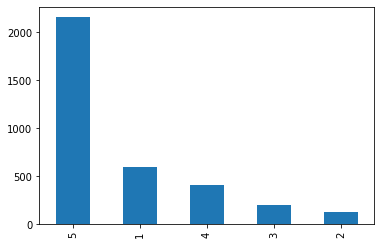

In [4]:
raw_data['Star Rating'].value_counts().plot(kind='bar')

In [5]:
is_bad_rating = raw_data['Star Rating'] <= 4
is_review_available = pd.notnull(raw_data['Review Text'])
is_no_review = pd.isnull(raw_data['Review Text'])
bad_ratting_no_review = raw_data[is_bad_rating & is_no_review]
bad_ratting_with_review = raw_data[is_bad_rating & is_review_available]
print("with review: ", len(bad_ratting_with_review), " vs no review: ", len(bad_ratting_no_review))

with review:  670  vs no review:  675


In [6]:
bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']][:100]

,Star Rating,Review Text,App Version Name
0,1,Yah quiper ngk gratis lagiiii,NaN
5,1,Di website quipper bilangnya akun gratis quipp...,6.0.23
8,3,Kurang bagus,6.0.23
10,3,Gimana sih kok gak nyampe katasandiny???????????,6.0.23
13,1,Terima kasih,6.0.15
...,...,...,...
63,1,Halo para angota quipper kalok mau promosiin l...,6.0.25
66,1,Aplikasi nya ngabisin memo guee :(,NaN
71,1,"Terimakasih quipper, sejak saya tahu aplikasi ...",6.0.25
72,1,Lemot lemot lemot lemot lemot lemot lemot,6.0.25
